✅ Data loaded successfully.

    CID  MolecularWeight  XLogP                     InChIKey  \
0  2244           180.16    1.2  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
1  1983           151.16    0.5  RZVAJINKPMORJF-UHFFFAOYSA-N   
2   702            46.07   -0.1  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
3  6322           174.20   -4.2  ODKSFYDXXFIFQN-BYPYZUCNSA-N   
4  5957           507.18   -5.7  ZKHQWZAMYRWXGA-KQYNXXCUSA-N   

                                     CanonicalSMILES  
0                           CC(=O)OC1=CC=CC=C1C(=O)O  
1                              CC(=O)NC1=CC=C(C=C1)O  
2                                                CCO  
3                             C(CC(C(=O)O)N)CN=C(N)N  
4  C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...  

📌 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CID              5 non-null      int64  
 1  

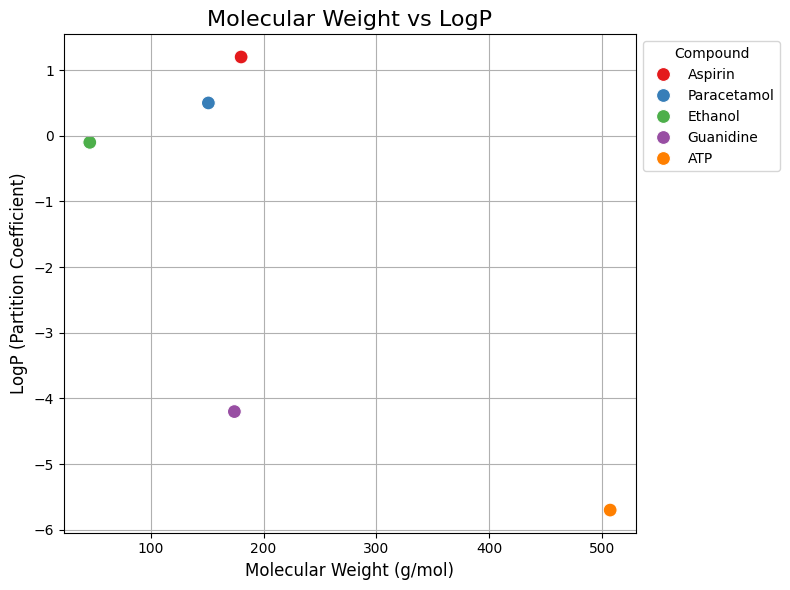

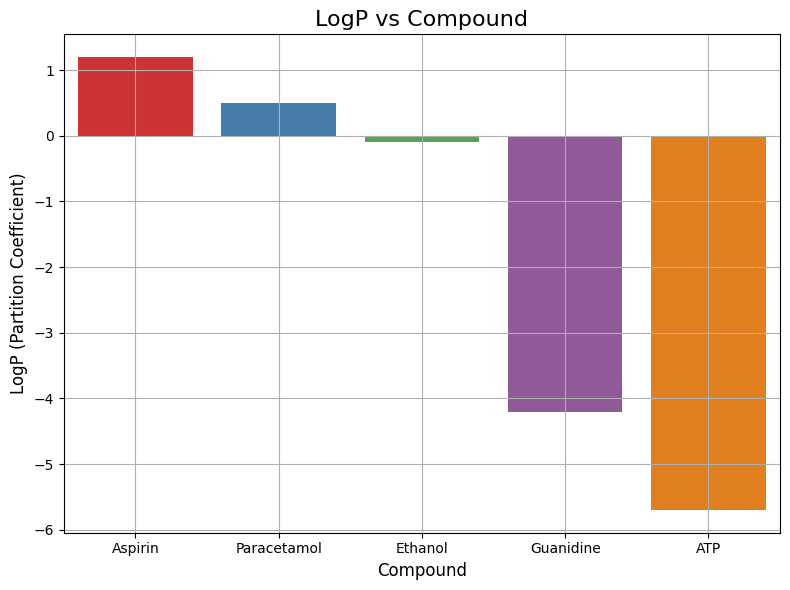

In [30]:
# Step 1: Import libraries
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset from PubChem API
url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244,1983,702,6322,5957/property/MolecularWeight,XLogP,InChIKey,CanonicalSMILES/CSV"
response = requests.get(url)

if response.status_code == 200:
    # Load the CSV content from the response text
    df = pd.read_csv(io.StringIO(response.text))
    print("✅ Data loaded successfully.\n")
    
    # Display the first few rows
    print(df.head())

    # Step 3: Inspect the Data
    print("\n📌 Data Info:")
    df.info()

    print("\n📌 Missing Values:")
    print(df.isnull().sum())

    # Step 4: Data Cleaning
    df.columns = ['CID', 'MolWeight', 'LogP', 'InChIKey', 'SMILES']
    df['MolWeight'] = df['MolWeight'].round(2)
    df['LogP'] = df['LogP'].round(2)

    compound_names = {
        2244: "Aspirin",
        1983: "Paracetamol",
        702: "Ethanol",
        6322: "Guanidine",
        5957: "ATP"
    }
    df['Compound'] = df['CID'].map(compound_names)

    print("\n✅ Cleaned Data Preview:")
    print(df)

    # Step 5: Visualize the trends

    # Plot 1: Molecular Weight vs LogP (Scatter Plot)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='MolWeight', y='LogP', data=df, hue='Compound', palette='Set1', s=100)
    plt.title('Molecular Weight vs LogP', fontsize=16)
    plt.xlabel('Molecular Weight (g/mol)', fontsize=12)
    plt.ylabel('LogP (Partition Coefficient)', fontsize=12)
    plt.legend(title='Compound', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 2: LogP vs Compound (Bar Plot) - Fixed FutureWarning
    plt.figure(figsize=(8,6))
    sns.barplot(x='Compound', y='LogP', data=df, hue='Compound', palette='Set1', legend=False)
    plt.title('LogP vs Compound', fontsize=16)
    plt.xlabel('Compound', fontsize=12)
    plt.ylabel('LogP (Partition Coefficient)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Failed to retrieve data. Status code:", response.status_code)


 


In [31]:
import os
os.getcwd()



'C:\\Users\\Jahnavi'